## Import Libraries

In [100]:
# basic libraries
import re
import numpy as np
import pandas as pd

In [2]:
# nlp libraries
import nltk
# nltk.download('wordnet')
# nltk.download("stopwords")
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [5]:
# machine learning libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [105]:
# data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# other libraries
import joblib

## Dataframes Defining

In [83]:
# read csv file
df = pd.read_csv("age_dialogues.csv")

In [84]:
# top 10 rows
df.head(10)

,Age,Dialogue
0,20.0,Can we have a day where responsibilities don't...
1,11.0,Joining a sports team at school. Looking forwa...
2,49.0,Have you tried practicing yoga? It's excellent...
3,54.0,Reflecting on the importance of work-life bala...
4,95.0,Have you explored technological advancements f...
5,16.0,Getting involved in school leadership roles. L...
6,98.0,Attending a photography class. Capturing memor...
7,70.0,Thinking of starting a fitness program for sen...
8,85.0,Considering a legacy project. Any ideas for le...
9,49.0,Attending workshops on personal development an...


In [85]:
# defining stopwords set and lemma
set_of_stopwords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [86]:
# function to remove contractions and replace by spaces
def remove_contractions(text):

    contractions = ["ain't", "aren't", "can't", "can't've", "'cause", "could've", "couldn't", "couldn't've", "didn't", "doesn't", "don't",
                    "hadn't", "hadn't've", "hasn't", "haven't", "he'd", "he'd've", "he'll", "he'll've", "he's", "how'd", "how'd'y", "how'll", "how's",
                    "I'd", "I'd've", "I'll", "I'll've", "I'm", "I've", "isn't", "it'd", "it'd've", "it'll", "it'll've", "it's", "let's",
                    "ma'am", "mayn't", "might've", "mightn't", "mightn't've", "must've", "mustn't", "mustn't've", "needn't", "needn't've",
                    "o'clock", "oughtn't", "oughtn't've", "shan't", "sha'n't", "shan't've", "she'd", "she'd've", "she'll", "she'll've", "she's",
                    "should've", "shouldn't", "shouldn't've", "so've", "so's", "that'd", "that'd've", "that's", "there'd", "there'd've", "there's",
                    "they'd", "they'd've", "they'll", "they'll've", "they're", "they've", "to've", "wasn't",
                    "we'd", "we'd've", "we'll", "we'll've", "we're", "we've", "weren't", "what'll", "what'll've", "what're", "what's", "what've",
                    "when's", "when've", "where'd", "where's", "where've", "who'll", "who'll've", "who's", "who've", "why's", "why've",
                    "will've", "won't", "won't've", "would've", "wouldn't", "wouldn't've", "y'all", "y'all'd", "y'all'd've", "y'all're", "y'all've",
                    "you'd", "you'd've", "you'll", "you'll've", "you're", "you've", "gonna"]

    for contraction in contractions:
        text = text.replace(contraction, " ")

    return text

In [87]:
# function to remove punctuations
def remove_punctuations(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [88]:
# function to check noun
def is_noun(word):
    synsets = wordnet.synsets(word)
    for synset in synsets:
        if synset.pos() == 'n':
            return True
    return False

In [89]:
# dialogue to cleaned dialogue
def cleaned_dialogue(text):
    if text is None:
        return None
    contractionless_text = remove_contractions(text)
    punctuationless_text = remove_punctuations(contractionless_text)
    tokens = nltk.word_tokenize(punctuationless_text)
    filtered_words = [token.lower() for token in tokens if token.lower() not in set_of_stopwords]
    lemmatized_words = [lemma.lemmatize(word) for word in filtered_words]
    words = [word for word in lemmatized_words if is_noun(word)]
    return ' '.join(words)

In [90]:
# list of words for dialogue
dialogue_list = []
for dialogue in df.Dialogue:
    dialogue_list.append(cleaned_dialogue(dialogue))
df['Cleaned Dialogue'] = dialogue_list

In [91]:
# bottom 10 rows with Cleaned Dialogue
df.tail(10)

,Age,Dialogue,Cleaned Dialogue
973,5.0,I told my toy fish to swim in the air. It trie...,toy fish swim air
974,15.0,"If I were an artist, I'd paint a mural of drea...",artist paint mural dream wall city
975,10.0,What if our dreams are alternate reality versi...,dream alternate reality version living life
976,47.0,Planning a beach vacation. Any beach destinati...,planning beach vacation beach destination
977,21.0,"If adulting came with a manual, I'd probably m...",manual
978,5.0,Having a puppet show with handmade sock puppet...,puppet show sock puppet lot laughter
979,3.0,Visited the fire station and sat in a real fir...,fire station sat real fire truck
980,2.0,Got a new teddy bear as a gift. Named it Fluffy!,teddy bear gift
981,60.0,Reflecting on a lifetime of experiences and ac...,lifetime experience achievement wisdom share
982,44.0,Reflecting on the importance of work-life bala...,importance balance


## Count Vectorizer

In [92]:
# defining count vectorizer
max_features = 5000
count_vectorizer = CountVectorizer(max_features = max_features, stop_words = "english")

In [93]:
# defining sparse matrix
sparse_matrix = count_vectorizer.fit_transform(dialogue_list).toarray()

## Model Training and Testing

In [94]:
# defining X and y
X = sparse_matrix
y = df.iloc[:,0].values

In [95]:
list(y)

[20.0,
 11.0,
 49.0,
 54.0,
 95.0,
 16.0,
 98.0,
 70.0,
 85.0,
 49.0,
 65.0,
 15.0,
 46.0,
 13.0,
 2.0,
 25.0,
 74.0,
 45.0,
 36.0,
 34.0,
 50.0,
 6.0,
 68.0,
 24.0,
 68.0,
 71.0,
 90.0,
 4.0,
 72.0,
 3.0,
 27.0,
 21.0,
 36.0,
 54.0,
 16.0,
 20.0,
 76.0,
 56.0,
 78.0,
 15.0,
 42.0,
 59.0,
 27.0,
 46.0,
 14.0,
 53.0,
 6.0,
 37.0,
 13.0,
 7.0,
 78.0,
 29.0,
 26.0,
 45.0,
 6.0,
 45.0,
 45.0,
 72.0,
 39.0,
 22.0,
 42.0,
 7.0,
 51.0,
 38.0,
 29.0,
 42.0,
 32.0,
 10.0,
 4.0,
 24.0,
 78.0,
 53.0,
 90.0,
 80.0,
 34.0,
 45.0,
 30.0,
 23.0,
 56.0,
 11.0,
 34.0,
 10.0,
 20.0,
 23.0,
 11.0,
 12.0,
 38.0,
 9.0,
 20.0,
 92.0,
 10.0,
 5.0,
 42.0,
 92.0,
 12.0,
 22.0,
 41.0,
 88.0,
 48.0,
 24.0,
 11.0,
 54.0,
 69.0,
 13.0,
 17.0,
 65.0,
 29.0,
 6.0,
 52.0,
 8.0,
 79.0,
 47.0,
 60.0,
 19.0,
 51.0,
 8.0,
 58.0,
 2.0,
 12.0,
 57.0,
 10.0,
 10.0,
 55.0,
 4.0,
 3.0,
 31.0,
 5.0,
 76.0,
 2.0,
 54.0,
 34.0,
 25.0,
 18.0,
 59.0,
 26.0,
 38.0,
 22.0,
 30.0,
 38.0,
 39.0,
 54.0,
 75.0,
 76.0,
 38.0,
 23.0,
 5.0

In [96]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [97]:
# defining models
lr_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
svr_model = SVR()
dtr_model = DecisionTreeRegressor()
rfr_model = RandomForestRegressor()
gbr_model = GradientBoostingRegressor()
knr_model = KNeighborsRegressor()

In [98]:
# models fitting
lr_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
dtr_model.fit(X_train, y_train)
rfr_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)
knr_model.fit(X_train, y_train)

KNeighborsRegressor()

In [103]:
# model testing using mean_absolute_error
print("MEAN ABSOLUTE ERROR")
print("Linear Regression", mean_absolute_error(lr_model.predict(X_test), y_test))
print("Lasso Regression", mean_absolute_error(lasso_model.predict(X_test), y_test))
print("Ridge Regression", mean_absolute_error(ridge_model.predict(X_test), y_test))
print("Support Vector Regression", mean_absolute_error(svr_model.predict(X_test), y_test))
print("Decision Tree Regression", mean_absolute_error(dtr_model.predict(X_test), y_test))
print("Random Forest Regression", mean_absolute_error(rfr_model.predict(X_test), y_test))
print("Gradient Boosting Regression", mean_absolute_error(gbr_model.predict(X_test), y_test))
print("KNN Regression", mean_absolute_error(knr_model.predict(X_test), y_test))

MEAN ABSOLUTE ERROR
Linear Regression 50762643402004.25
Lasso Regression 18.232619848202635
Ridge Regression 11.169968652957113
Support Vector Regression 17.80227844257559
Decision Tree Regression 11.42845117845118
Random Forest Regression 10.19056049309837
Gradient Boosting Regression 13.594983288352855
KNN Regression 13.511111111111111


In [104]:
# model testing using root mean_squared_error
print("ROOT MEAN SQUARED ERROR")
print("Linear Regression", np.sqrt(mean_squared_error(lr_model.predict(X_test), y_test)))
print("Lasso Regression", np.sqrt(mean_squared_error(lasso_model.predict(X_test), y_test)))
print("Ridge Regression", np.sqrt(mean_squared_error(ridge_model.predict(X_test), y_test)))
print("Support Vector Regression", np.sqrt(mean_squared_error(svr_model.predict(X_test), y_test)))
print("Decision Tree Regression", np.sqrt(mean_squared_error(dtr_model.predict(X_test), y_test)))
print("Random Forest Regression", np.sqrt(mean_squared_error(rfr_model.predict(X_test), y_test)))
print("Gradient Boosting Regression", np.sqrt(mean_squared_error(gbr_model.predict(X_test), y_test)))
print("KNN Regression", np.sqrt(mean_squared_error(knr_model.predict(X_test), y_test)))

ROOT MEAN SQUARED ERROR
Linear Regression 126944377687358.4
Lasso Regression 21.620345516138684
Ridge Regression 14.731489213072171
Support Vector Regression 21.255000962086672
Decision Tree Regression 17.20685409136897
Random Forest Regression 14.607582050742973
Gradient Boosting Regression 17.128893427971455
KNN Regression 16.809665329352885


In [114]:
# create sorted dataframe of results with new index
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': rfr_model.predict(X_test)})
df_results = df_results.sort_values(by='Actual', ascending=True)
df_results = df_results.reset_index(drop=True)
df_results['index'] = df_results.index

In [115]:
# top 10 rows of df_results
df_results.head(10)

,Actual,Predicted,index
0,1.0,7.5940,0
1,1.0,31.9125,1
2,1.0,5.6200,2
3,2.0,8.8200,3
4,3.0,5.0200,4
5,4.0,10.6000,5
6,4.0,5.1800,6
7,5.0,6.2600,7
8,5.0,16.4200,8
9,5.0,7.4700,9


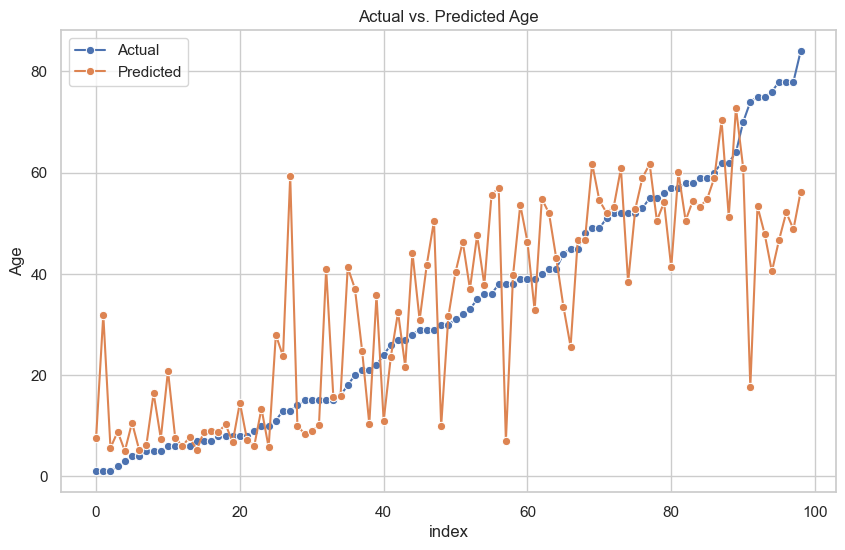

In [116]:
# visualizing Random Forest Regression results
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='index', y='Actual', data=df_results, label='Actual', marker='o')
sns.lineplot(x='index', y='Predicted', data=df_results, label='Predicted', marker='o')
plt.xlabel('index')
plt.ylabel('Age')
plt.title('Actual vs. Predicted Age')
plt.legend()
plt.show()

## Model Saving

In [117]:
# saving count vectorizer and Gaussian Naive-Bayes model
joblib.dump(count_vectorizer, 'age_cv.joblib')
joblib.dump(rfr_model, 'age_model.joblib')

['age_model.joblib']